<a href="https://colab.research.google.com/github/Darius2527/ChurnModelling-Classification/blob/main/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#LOADING THE DATASET
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()
#no null values present

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#lets drop unnecessary columns
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#let us create dummy variables for Geography and Gender columns
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [7]:
df["Geography_Germany"] = df["Geography_Germany"].astype(int)
df["Geography_Spain"] = df["Geography_Spain"].astype(int)
df["Gender_Male"]=df["Gender_Male"].astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
df["Exited"].value_counts()
#we can see that the data is inbalanced

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: >

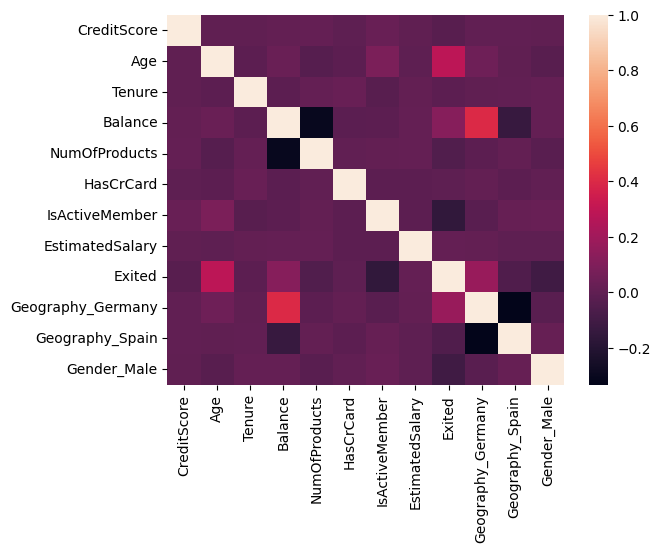

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
#extracting features and target
X=df.drop(columns=["Exited"])
Y=df["Exited"]

In [11]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
#splitting dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
model_accuracy={}
roc_score={}


In [16]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elastic',None],
            'C':[0.01,0.05,0.1,0.5,1],
            'tol':[1e-5,1e-4,1e-3,1e-2],
            }
clf=GridSearchCV(LogisticRegression(),parameters,cv=5)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elastic', None],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]})

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00204453, 0.00122766, 0.00116768, 0.00116024, 0.04199057,
        0.04984574, 0.04464941, 0.04420452, 0.00180283, 0.00188985,
        0.00176616, 0.00187883, 0.04359326, 0.05150528, 0.0455894 ,
        0.04668927, 0.00185823, 0.00172997, 0.00182552, 0.00171576,
        0.04265814, 0.04870324, 0.04469647, 0.04469175, 0.00185428,
        0.00167928, 0.00180955, 0.0016686 , 0.04458232, 0.05336108,
        0.04528246, 0.04323487, 0.00253811, 0.00176549, 0.0017169 ,
        0.00172615, 0.04457531, 0.04525151, 0.04399924, 0.04364762,
        0.00173025, 0.00167756, 0.00165606, 0.0017323 , 0.04673915,
        0.04667668, 0.04472399, 0.04442177, 0.00181556, 0.00171742,
        0.00171418, 0.0016984 , 0.04366179, 0.09955482, 0.09252381,
        0.08301482, 0.00448318, 0.00271921, 0.00409155, 0.00206795,
        0.11291971, 0.11096787, 0.09713759, 0.09219241, 0.00280366,
        0.00485964, 0.00459137, 0.00366502, 0.05428548, 0.04602547,
        0.04157209, 0.04354057,

In [18]:
#checking best parameter
best_params=clf.best_params_
best_params

{'C': 0.01, 'penalty': 'l2', 'tol': 1e-05}

In [19]:
#creating model with best parameters
model_LR=clf.best_estimator_
model_LR.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 1e-05,
 'verbose': 0,
 'warm_start': False}

In [20]:
#predicting output for test data
Y_pred=model_LR.predict(X_test)

In [21]:
#checking performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_LR=accuracy_score(Y_test,Y_pred)
rocscore_LR=roc_auc_score(Y_test,Y_pred)
model_accuracy["Logistic Regression"]=accuracy_LR
roc_score["Logistic Regression"]=rocscore_LR
print(accuracy_LR)
print(rocscore_LR)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


0.789
0.5176980533302372
[[1553   42]
 [ 380   25]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [ ]:
#SVM Classifier
from sklearn.svm import SVC
parameters={'C':[0.1,0.5,1],
            'kernel':['linear','poly','rbf']}
clf=GridSearchCV(SVC(),parameters,cv=5)
clf.fit(X_train,Y_train)


In [ ]:
clf.cv_results_

In [ ]:
best_params=clf.best_params_
best_params

In [ ]:
model_SVC=clf.best_estimator_
model_SVC.get_params()

In [ ]:
Y_pred=model_SVC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_SVM=accuracy_score(Y_test,Y_pred)
rocscore_SVM=roc_auc_score(Y_test,Y_pred)
model_accuracy["SVM classifier"]=accuracy_SVM
roc_score["SVM classifier"]=rocscore_SVM
print(accuracy_SVM)
print(rocscore_SVM)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


In [22]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[3,5,7,9,11],
            'p':[1,2],
            'leaf_size':[10,20,30],
            'weights':['uniform','auto'],}
clf=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/s

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'auto']})

In [23]:
clf.cv_results_

{'mean_fit_time': array([0.01426635, 0.00139322, 0.01292253, 0.00190306, 0.02306023,
        0.00172606, 0.02315636, 0.00171976, 0.0226923 , 0.00184612,
        0.02262268, 0.00120859, 0.01362109, 0.00123529, 0.01298318,
        0.00123863, 0.01295094, 0.00120521, 0.0157444 , 0.00125499,
        0.01181512, 0.00120616, 0.01265264, 0.00140114, 0.01170702,
        0.00112996, 0.01218476, 0.00131631, 0.01166115, 0.00122852,
        0.01308079, 0.00137658, 0.01170864, 0.00152073, 0.01170144,
        0.00119247, 0.01212521, 0.00119553, 0.01282806, 0.00117121,
        0.01098275, 0.00117054, 0.01082964, 0.00125146, 0.01055121,
        0.00117273, 0.01202149, 0.00122008, 0.01391683, 0.00171704,
        0.01821413, 0.0016901 , 0.01913629, 0.00180626, 0.01962857,
        0.00185437, 0.01562614, 0.00120997, 0.01206207, 0.00123596]),
 'std_fit_time': array([1.66610412e-03, 4.01792355e-04, 3.45289965e-04, 9.74876048e-05,
        1.40980775e-03, 1.40408391e-04, 1.08064758e-03, 1.29376334e-04,
     

In [24]:
best_params=clf.best_params_
best_params

{'leaf_size': 10, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

In [25]:
model_KNN=clf.best_estimator_
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [26]:
Y_pred=model_KNN.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_KNN=accuracy_score(Y_test,Y_pred)
rocscore_KNN=roc_auc_score(Y_test,Y_pred)
model_accuracy["KNN"]=accuracy_KNN
roc_score["KNN"]=rocscore_KNN
print(accuracy_KNN)
print(rocscore_KNN)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


0.79
0.5072719532489648
[[1567   28]
 [ 392   13]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1595
           1       0.32      0.03      0.06       405

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.47      2000
weighted avg       0.70      0.79      0.72      2000



In [28]:
#Naive Bayes Classifier
#no hyperparameter tuning as naive bayes does not have any hyperparameters to tune
#let us apply K fold cross validation for this model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
accuracy_NB=cross_val_score(NB,X,Y,cv=5,scoring='accuracy').mean()
rocscore_NB=cross_val_score(NB,X,Y,cv=5,scoring='roc_auc').mean()
model_accuracy["Naive Bayes Classifier"]=accuracy_NB
roc_score["Naive_Bayes_classifier"]=rocscore_NB
print(accuracy_NB)
print(rocscore_NB)

0.7847000000000001
0.7445921950423365


In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[50,100,250,500],
            'criterion':['gini','entropy'],
            'max_depth':[2,3,4,None]}
clf=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, None],
                         'n_estimators': [50, 100, 250, 500]})

In [30]:
clf.cv_results_

{'mean_fit_time': array([0.36696296, 0.44802022, 0.76925602, 1.74645143, 0.17784042,
        0.35827703, 0.89648557, 2.0145299 , 0.20877504, 0.412854  ,
        1.22334599, 2.48505764, 0.46111236, 0.91305246, 2.47398505,
        4.93614063, 0.16854014, 0.41583982, 0.95533414, 2.11107574,
        0.19748554, 0.39411612, 0.98051305, 2.18564925, 0.23105049,
        0.50044408, 1.28629737, 2.53293285, 0.52762003, 1.256148  ,
        2.87084308, 5.6873239 ]),
 'std_fit_time': array([0.17176694, 0.04332833, 0.00733933, 0.2784823 , 0.00439738,
        0.00106259, 0.00439114, 0.30900563, 0.00715554, 0.0063415 ,
        0.22707736, 0.44146218, 0.00351487, 0.01187507, 0.23846255,
        0.34647906, 0.00508806, 0.06776465, 0.17358299, 0.92747687,
        0.00775132, 0.00868974, 0.00994482, 0.2789619 , 0.00532303,
        0.09313158, 0.23485349, 0.36131602, 0.00825443, 0.19008331,
        0.2867813 , 0.41966364]),
 'mean_score_time': array([0.0229435 , 0.022755  , 0.04015312, 0.1332778 , 0.011595

In [31]:
best_params=clf.best_params_
best_params

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 500}

In [32]:
model_RF=clf.best_estimator_
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
Y_pred=model_RF.predict(X_test)

In [34]:
accuracy_RF=accuracy_score(Y_test,Y_pred)
rocscore_RF=roc_auc_score(Y_test,Y_pred)
model_accuracy["Random Forest"]=accuracy_RF
roc_score["Random Forest"]=rocscore_RF
print(accuracy_RF)
print(rocscore_RF)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.866
0.7345330701652542
[[1524   71]
 [ 197  208]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [42]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[50,100,250,500],
            'learning_rate':[0.1,0.25,0.5,0.75,1]}
clf=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 250, 500]})

In [43]:
clf.cv_results_

{'mean_fit_time': array([0.32356081, 0.80627232, 1.58366718, 3.57376246, 0.31905651,
        0.62903008, 1.76098428, 3.34353156, 0.31832294, 0.77707524,
        1.60517821, 3.6190114 , 0.31371007, 0.62949276, 1.74098306,
        3.32026458, 0.31543117, 0.80440574, 1.81662211, 3.73265443]),
 'std_fit_time': array([0.00828412, 0.12858116, 0.01242067, 0.47521676, 0.00488382,
        0.00999158, 0.21453838, 0.41190834, 0.00252581, 0.11998556,
        0.05812348, 0.41918865, 0.00432934, 0.00692723, 0.19419662,
        0.39156183, 0.00745863, 0.17490855, 0.38703849, 0.74396388]),
 'mean_score_time': array([0.0191793 , 0.04511056, 0.08980055, 0.19963694, 0.01976514,
        0.036903  , 0.09410892, 0.18900399, 0.02156806, 0.04989157,
        0.08742414, 0.18688941, 0.01915216, 0.03491683, 0.09793963,
        0.18326106, 0.01984344, 0.04586163, 0.09551501, 0.18003669]),
 'std_score_time': array([0.00098926, 0.00945162, 0.00633281, 0.03661055, 0.00134399,
        0.00258121, 0.01741813, 0.033775

In [44]:
best_params=clf.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 250}

In [45]:
model_adaboost=clf.best_estimator_
model_adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 250,
 'random_state': None}

In [46]:
Y_pred=model_adaboost.predict(X_test)

In [47]:
accuracy_adaboost=accuracy_score(Y_test,Y_pred)
rocscore_adaboost=roc_auc_score(Y_test,Y_pred)
model_accuracy["AdaBoost"]=accuracy_adaboost
roc_score["AdaBoost"]=rocscore_adaboost
print(accuracy_adaboost)
print(rocscore_adaboost)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.867
0.735160029412903
[[1526   69]
 [ 197  208]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



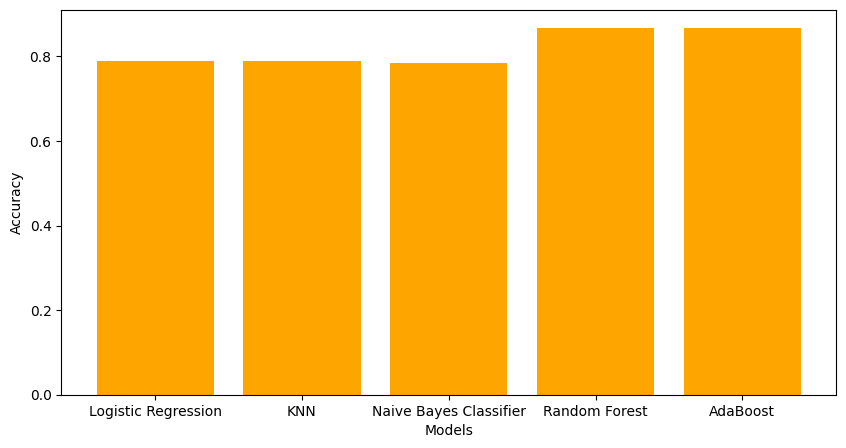

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(model_accuracy.keys(),model_accuracy.values(),label="accuracy",color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

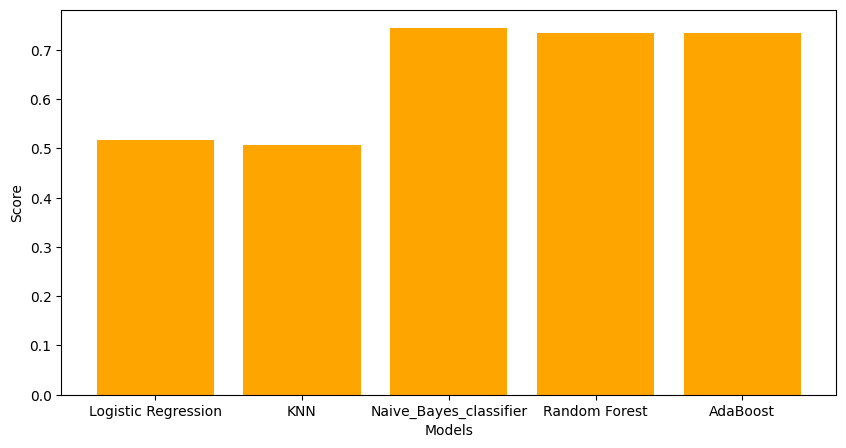

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(roc_score.keys(),roc_score.values(),label="ROC score",color='orange')
plt.xlabel("Models")
plt.ylabel("Score")
plt.show()

In [53]:
#AdaBoost has highest accuracy
#Naive Bayes has highest ROC
#accuracy can be improved if we obtain a balanced dataset using sampling techniques
#accuracy can be improved by applying hyperparameter tuning across more alues for hyperparameters